# Logistic regression

## Review
In Section 4.2 we saw that under rather general assumptions (class-conditional distribution is shared-variance Gaussian), the posterior probability of class $C_1$ can be writen as a logistic sigmoid acting on a linear function of the feature vector $\phi$ so that

$$p(C_1|\phi) = y(\phi) = \sigma(\mathbf{w}^T\phi) \tag{4.87}$$ 

where 
- $\phi = \phi(\mathbf{x})$, is the transformation that can transform an $M'$-dimensional feature $\mathbf{x}$ to another $M$-dimensional feature $\phi(\mathbf{x})$.
- $\displaystyle{\sigma(a) = \frac{1}{1+exp(-a)}}$ is the logistic sigmoid function.


## From generative to discriminative
Under the assumption of shared-varianced Gaussian class-condisional densities, for an $M$-dimensional feature space $\phi$, we would have used total of $M(M+5)/2+1$ parameters which consist of 
- $2M$ parameters for the mean.
- $M(M+1)/2$ parameters for the shared covariance matrix.
- $1$ class prior $p(C_1)$.

Whereas the logistic regression model have only $M$ of the number of parameters. For large values of $M$, there is a clear advantage in working with the logistic regression model directly.

## Maximum likelihood
We now use maximum likelihood to determine the parameters of the logistic regression model. To do this, we shall make use of the derivateive of the logistic sigmoid function, which can conviniently be expressed in terms of the sigmoid function itself

$$\frac{d\sigma}{da} = \sigma(1-\sigma) \tag{4.88}$$

The likelihood function is given by

$$p(\mathbb{t}|\mathbf{w}) = \prod_{n=1}^N y_n^{t_n}\{1-y_n\}^{1-t_n} \tag{4.89}$$

where
- $\{\mathbf{X},\mathbb{t}\}$ is the data set.
- $\mathbb{t} = (t_1, \cdots, t_N)^T$ denotes the class of $N$ input features $\mathbf{X} = (\mathbf{x}_1,\cdots,\mathbf{x}_N)^T$. Here is a two-class problem, so $t_n\in\{0,1\}$.
- $y_n = p(C_1|\phi_n) = \sigma(a) = \sigma(\mathbf{w}^T\phi_n) = \sigma(\mathbf{w}^T\phi(\mathbf{x}_n))$ is the probability of classifying to $C_1$ given the data point $\mathbf{x}_n$.
- $\phi_n = \phi(\mathbf{x}_n)$ denotes the transformation from $\mathbf{x}_n$ to $\phi_n$.

Our goal is to maximize the likelihood function, which is the same as to minimize the negative logarithm of the likelihood, which gives the cross entropy error function in the form

$$E(\mathbf{w}) = -\ln p(\mathbb{t}|\mathbf{w}) = -\sum_{n=1}^N\{t_n\ln y_n+(1-t_n)\ln (1-y_n)\} \tag{4.90}$$

Taking the gradient of the error function with respect to $\mathbf{w}$, we obtain

$$\begin{align*}
\nabla E(\mathbf{w}) &= \frac{d}{d\mathbf{w}} \left\{-\sum_{n=1}^N\{t_n\ln y_n+(1-t_n)\ln (1-y_n)\}\right\}\\
&= \frac{d}{d\mathbf{w}} \left\{ -\sum_{n=1}^N\{t_n\ln \sigma(a)+(1-t_n)\ln (1-\sigma(a))\} \right\}\qquad a=\mathbf{w}^T\phi_n\\
&=\frac{da}{d\mathbf{w}} \frac{d\sigma}{da}\frac{d}{d\sigma}\left\{ -\sum_{n=1}^N\{t_n\ln \sigma+(1-t_n)\ln (1-\sigma)\} \right\}\\
&=\frac{da}{d\mathbf{w}} \frac{d\sigma}{da}\left\{ -\sum_{n=1}^N\left\{\frac{t_n}{\sigma}-\frac{(1-t_n)}{1-\sigma}\right\} \right\}\\
&=\frac{da}{d\mathbf{w}} \frac{d\sigma}{da}\left\{ -\sum_{n=1}^N\left\{\frac{t_n-t_n\sigma-\sigma+t_n\sigma}{\sigma(1-\sigma)}\right\} \right\}\\
&=\frac{da}{d\mathbf{w}} \frac{d\sigma}{da}\left\{ \sum_{n=1}^N\left\{\frac{\sigma-t_n}{\sigma(1-\sigma)}\right\} \right\}\\
&=\phi_n\cdot \sigma(1-\sigma)\cdot\left\{ \sum_{n=1}^N\left\{\frac{\sigma-t_n}{\sigma(1-\sigma)}\right\} \right\}\qquad make\ use\ of\ (4.88)\\
&=\sum_{n=1}^N(\sigma-t_n)\phi_n\\
\color{red}{\nabla E(\mathbf{w})}&=\color{red}{\sum_{n=1}^N(y_n-t_n)\phi_n} \tag{4.91}
\end{align*}$$


## Over-fitting

If the transformed training data set $\phi_n$ is linearly separable, the decision boundary that seperate two classes will have the property

$$\mathbf{w}^T\phi_n \left\{
\begin{array}{ll}
\geqslant 0 & if\ t_n = 1\\
<0 & if\ t_n = 0
\end{array}
\right .$$

Moreover, from (4.90) we see that the error $E(\mathbf{w})$ will have the minimum if $y_n=t_n$ for all $n$. And the sigmoid function $y_n=\sigma(\mathbf{w}^T\phi_n)$ will generate the result that is close to $0$ or $1$ for the value $\mathbf{w}^T\phi_n$ that have large magnitude. This suggests that the magnitude of the parameters goes to infinity.

In this case, everything seems ok in $\phi$ space. But in feature space, every training piont from each class $k$ is assigned a posterior probability $p(C_k|\mathbf{x}) = 1$, which leads to infinitely steep decision boundary. And this is the tipical presentation of over-fitting.

-------------------


# IRLS (Iterative reweighted least squares)

<font color='red'>For logistic regression, there is no longer a closed-form solution, due to the nonlinearity of the logistic sigmoid function.</font> However, the error function is concave, and hence has a unique minimum. We can therefore use use a technique based on the *Newton-Raphson* iterative optimization scheme to obtain the approximation of the parameters corresponding to the minimum of the error function.

We want to find the parameters that satisfy

$$\nabla E(\mathbf{w}) = 0$$

The Newton-Raphson update takes the form

$$\mathbf{w}^{(new)} = \mathbf{w}^{(old)}-\mathbf{H}^{-1}\nabla E(\mathbf{w})\tag{4.92}$$


## Newton-Raphson for Linear regression
For linear regression model (3.3) with the sum-of-squares error function (3.12),

$$\begin{align*}
\nabla E(\mathbf{w}) &= \sum_{n=1}^N(y_n-t_n)\phi_n = \sum_{n=1}^N(\mathbf{w}^T\phi_n-t_n)\phi_n = \Phi^T\Phi\mathbf{w}-\Phi^T\mathbb{t} \tag{4.93}\\
\mathbf{H} &= \nabla\nabla E(\mathbf{w}) = \sum_{n=1}^N\phi_n\phi_n^T = \Phi^T\Phi \tag{4.94}\\
\Phi &=\begin{bmatrix}
\phi_0(\mathbf{x}_1) &\phi_1(\mathbf{x}_1) &\cdots &\phi_{M-1}(\mathbf{x}_1)\\
\phi_0(\mathbf{x}_2) &\phi_1(\mathbf{x}_2) &\cdots &\phi_{M-1}(\mathbf{x}_2)\\
\vdots &\vdots &\ddots &\vdots\\
\phi_0(\mathbf{x}_N) &\phi_1(\mathbf{x}_N) &\cdots &\phi_{M-1}(\mathbf{x}_N)\\
\end{bmatrix}\\
\end{align*}$$

The Newton-Raphson update then takes the form

$$\begin{align*}
\mathbf{w}^{(new)} &= \mathbf{w}^{(old)} - (\Phi^T\Phi)^{-1}\{ \Phi^T\Phi\mathbf{w}^{(old)} - \Phi^T\mathbb{t} \}\\
&=(\Phi^T\Phi)^{-1}\Phi^T\mathbb{t} \tag{4.95}
\end{align*}$$

The Newton-Raphson formula gives the exact solution in one step.

## Newton-Raphson for Logistic regression

From (4.91), we see that the gradient and Hessian of the cross-entropy error function are given by

$$\begin{align*}
\nabla E(\mathbf{w}) &= \sum_{n=1}^N(y_n-t_n)\phi_n = \Phi^T(\mathbb{y}-\mathbb{t}) \tag{4.96}\\
\mathbf{H} &= \nabla\nabla E(\mathbf{w}) = \sum_{n=1}^N y_n(1-y_n)\phi_n\phi_n^T = \Phi^T\mathbf{R}\Phi \tag{4.97}\\
\mathbf{R} &= \begin{bmatrix}
R_{11} &0 &\cdots &0\\
0 &R_{22} &\cdots &0\\
\vdots &\vdots &\ddots &\vdots \\
0 &0 &\cdots &R_{NN}
\end{bmatrix} \qquad R_{nn} = y_n(1-y_n)\tag{4.98}
\end{align*}$$

The Hessian matrix $\mathbf{H}$ is positive difinite because it has the form $\Phi^T\mathbf{R}\Phi$ and the elements of the diagonal matrix $\mathbf{R}$ have the property $0<y_n<1$. It follows that the error function is a concave function of $\mathbf{w}$ and hence has a unique minimum.

The Newton-Raphson update formula for the logistic regression model then becomes

<font color='red'>$$\begin{align*}
\mathbf{w}^{(new)} &= \mathbf{w}^{(old)} - (\Phi^T\mathbf{R}\Phi)^{-1}\Phi^T(\mathbb{y}-\mathbb{t})\\
&=(\Phi^T\mathbf{R}\Phi)^{-1}\big\{\Phi^T\mathbf{R}\Phi\mathbf{w}^{(old)}-\Phi^T(\mathbb{y}-\mathbb{t})\big\}\\
 &= (\Phi^T\mathbf{R}\Phi)^{-1}\Phi^T\mathbf{R}\mathbb{z} \tag{4.99}
\end{align*}$$</font>

where $\mathbb{z}$ is an $N$-dimensional vector with elements

<font color='red'>$$\mathbb{z} = \Phi\mathbf{w}^{(old)}-\mathbf{R}^{-1}(\mathbb{y}-\mathbb{t}) \tag{4.100}$$</font>

<font color='red'>Because the weighting matrix $\mathbf{R}$ is not constant but depends on the parameter vector $\mathbf{w}$, we must apply the normal equations iteratively, each time using the new weight vector $\mathbf{w}$ to compute a revised weighting matrix $\mathbf{R}$. For this reason, the algorithm is known as *iterative reweighted least squares*, or *IRLS*.</font>

## Interpretation of $\mathbf{R}$ and $\mathbb{z}$

As in the weighted least-squares problem, the elements of the diagonal weighting matrix $\mathbf{R}$ can be interpreted as variances because the means (the decision boundary) and variance of $t$ in the logistic regression model are given by

$$\begin{align*}
\mathbb{E}[t] &= \sigma(\mathbf{x}) = y \tag{4.101}\\
var[t] &= \mathbb{E}[t^2]-\mathbb{E}[t]^2 = \sigma(\mathbf{x}) - \sigma(\mathbf{x})^2=y(1-y) \tag{4.102}
\end{align*}$$

where we have used the property $t^2=t$ for $t\in\{0,1\}$.

The quantity $z_n$, which corresponds to the $n^{th}$ element of $\mathbb{z}$, can be given a simple interpretation as an effective target value in the space of the variable $a = \mathbf{w}^T\phi$ obtained by making alocal linear approximation to the logistic sigmoid function around the current operating point $\mathbf{w}^{(old)}$.

$$\begin{align*}
y_n = \sigma(a_n) &\Rightarrow a_n = \sigma^{-}(y_n)\qquad \sigma^{-}\ is\ the\ inverse\ function\ of\ \sigma\\
a_n(\mathbf{w}) &\simeq a_n(\mathbf{w}^{(old)})+\left.\frac{da_n}{dy_n}\right|_{\mathbf{w}^{(old)}}(t_n-y_n)\\
&=\phi_n^T\mathbf{w}^{(old)} - \frac{y_n-t_n}{y_n(1-y_n)}\\
&=z_n \tag{4.103}
\end{align*}$$


Iterate times 100
[0.42348314 4.33480415 1.4266894 ]


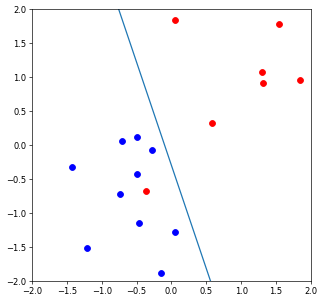

In [9]:
import numpy as np
import matplotlib.pyplot as plt

limX = [-2.0, 2.0]
limY = [-2.0, 2.0]

N=10
S1 = np.array([[0.5, 0.0],
               [0.0, 0.7]])
S2 = np.array([[0.4, 0.0],
               [0.0, 0.7]])
M1 = np.array([1, 1])
M2 = np.array([-1, -1])

Phi = lambda x: x

sigmoid = lambda a: 1.0/(1.0 + np.exp(-a))

def gen_data(n):
    X1 = np.random.multivariate_normal(mean=M1, cov=S1, size=n)
    X2 = np.random.multivariate_normal(mean=M2, cov=S2, size=n)
    X = np.vstack((X1, X2))
    T1 = np.ones(X1.shape[0])
    T2 = np.zeros(X2.shape[0])
    T = np.hstack((T1, T2))
    
    # add w0
    X = np.c_[np.ones((X.shape[0], 1)), X]
    return X, T

def plot_points(ax, X, T):
    for i in range(len(X)):
        if T[i]==1:
            ax.scatter(X[i][1], X[i][2], s=50, color='red')
        elif T[i]==0:
            ax.scatter(X[i][1], X[i][2], s=50, color='blue')
    
def IRLS(X, T, w, n):
    N = len(X)
    R = np.identity(N)
    Y = np.ones((N, ))
    for i in range(n):
        for j in range(N):
            y = sigmoid(w @ X[j].T)
            R[j][j] = y*(1-y)
            Y[j] = y
        if np.allclose(Y, T):
            print("Iterate times {}".format(i))
            return w
        try:
            w = w - np.linalg.inv(X.T @ R @ X) @ X.T @ (Y.T - T.T)
        except:
            print(R)
            print(Y)
            raise
    print("Iterate times {}".format(n))
    return w
    
def main():
    fig = plt.figure(figsize=(6,6), dpi=60)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(limX[0], limX[1])
    ax.set_ylim(limY[0], limY[1])
    
    x = np.linspace(-2, 2, 10)
    X, T = gen_data(N)
    plot_points(ax, X, T)
    
    w = np.array([1.0, 1.0, 1.0])
    w = IRLS(X, T, w, 100)

    print(w)
    ax.plot(x, -(w[1] * x + w[0])/w[2])
    plt.show()


if __name__ == "__main__":
    main()